# Task 3c Solution

In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

In [2]:
sci = np.load('data/detection_sci.npy') # read detection sci image
wht = np.load('data/detection_wht.npy') # read detection wht image

--- cut out a portion of the image for analysis

In [3]:
x = 3100 # x-center of the image
y = 1800 # y-center of the image
r = 200 # width/2 of cutout, must be int

In [4]:
sci = sci[x-r:x+r, y-r:y+r] # cutout a portion of the science image
wht = wht[x-r:x+r, y-r:y+r] # cutout a portion of the weight image

--- define the noise in each pixel and make a significance map (signal/noise)

In [5]:
noise = 1./np.sqrt(wht) # conversion from weight to noise
sig = sci/noise # significance map

--- now run segmentation on the image

In [6]:
from photutils import detect_sources

In [7]:
threshold = 2.5
npixels = 5

In [8]:
segm = detect_sources(sig, threshold, npixels)

--- loop through candidates and show cutouts of the detection image

In [9]:
ids = [83] # list of IDs of candidates

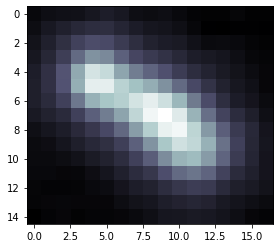

In [10]:
for id in ids:
    # a pair of python slice objects 
    #NOTE: the -1 is necessary as slices are only provided for objects not the background. 
    #The first object would be segm.slices[0] NOT segm.slices[1] because of python indexing convention. BE CAREFUL.
    slices = segm.slices[id-1]
    plt.imshow(sci[slices], cmap = 'bone') # apply slice to science image
    plt.show()